# WriteUp_TrafficSignClassifer_p2

In [1]:
from lib_traffic_sign_classifier import *
%matplotlib inline

## 6. Solution Approach :


## 7. Acquiring New Images
Using https://en.wikipedia.org/wiki/Road_signs_in_Germany to get some random sign to test

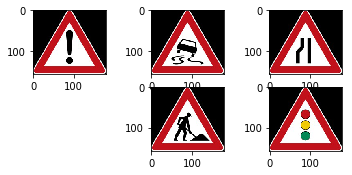

In [2]:
ext_result = load_external_traffic_sign()

In [3]:
X_ext_result = np.array([col[1] for col in ext_result])
y_ext_result = [col[0] for col in ext_result]

In [4]:
import tensorflow as tf
trained_model_file = "./LenetTrafficSign_Lenet2_8" #saver.restore(sess,tf.train.latest_checkpoint('./'))

In [5]:
#sess = tf.Session()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
logits = Lenet2(x)

In [6]:
n_classes          = 43
rate               = 0.001; EPOCHS             = 100; BATCH_SIZE         = 128;
one_hot_y          = tf.one_hot(y, n_classes)

cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation     = tf.reduce_mean(cross_entropy)

optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, trained_model_file)
    predictions = sess.run(logits, feed_dict={x: X_ext_result})
    
errors = 0
for prediction,i in zip(predictions, range(len(predictions))):
    print("expected/predicted class: {}/{}".format(y_ext_result[i], np.argmax(prediction)))
    if np.argmax(prediction) != y_ext_result[i]:
        errors += 1
print("correct:", len(predictions) - errors)

expected/predicted class: 18/18
expected/predicted class: 23/23
expected/predicted class: 38/28
expected/predicted class: 25/25
expected/predicted class: 26/26
correct: 4


## 8. Performance on New Images

### Analyze Performance : 
When Calculate the accuracy for these 5 new images, we got 80% accuracy

In [8]:
print("prediction accuracy : ", 100* (len(predictions) - errors)/len(predictions), " %")

prediction accuracy :  80.0  %


## Performance on our data set

In [10]:
X_train, y_train, X_valid, y_valid, X_test, y_test = load_training_data()

In [11]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, trained_model_file)
    test_accuracy = calculate_accuracy(X_valid, y_valid, x, y, accuracy_operation, BATCH_SIZE)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.942


## 9. Model Certainty - Softmax Probabilities

#### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [9]:
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('.'))
    saver.restore(sess, trained_model_file)
    probabilities = tf.nn.softmax(logits)
    predictions = sess.run(probabilities, feed_dict={x: X_ext_result})
    topk5 = sess.run(tf.nn.top_k(tf.constant(predictions), k=5)) 

print(topk5[0])
print(topk5[1])

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.15459394e-01   8.38193297e-02   7.21261720e-04   2.33760155e-14
    4.86662077e-18]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]
[[18  0  1  2  3]
 [23  0  1  2  3]
 [28 21 24  1 11]
 [25  0  1  2  3]
 [26  0  1  2  3]]


## DISCUSSION :